## Gaussian Process Regression

This notebook shows the implementation of gaussian process regression model and deriving mean absolute error for the __noisy__ data set Advertising taken from http://www-bcf.usc.edu/~gareth/ISL/data.html

Libraries used are
- pandas: for data analysis and handling
- numpy: for numerical computation
- matplotlib ans seaborn: for plotting data
- sklearn: for regression, classification models

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
from matplotlib import pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/pandas/computation/expressions.py:21: UserWarning: The installed version of numexpr 1.4.2 is not supported in pandas and will be not be used
The minimum supported version is 2.1

  "version is 2.1\n".format(ver=ver), UserWarning)


In [2]:
data=pd.read_csv('Advertising.csv',index_col=0)

In [3]:
feature_col=['TV','Radio','Newspaper']
X=data[feature_col]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [4]:
y=data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [5]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

_Adding Noise of 10% to the data_

In [7]:
dy =0.1 * y_train
noise = np.random.normal(0, dy)
y_train += noise

In [8]:
gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                     thetaL=1e-3, thetaU=1,
                     nugget=(dy / y_train) ** 2,
                     random_start=100)
gp.fit(X_train, y_train)

GaussianProcess(beta0=None, corr=<function squared_exponential at 0x4389cf8>,
        normalize=True,
        nugget=array([ 0.01387,  0.01144, ...,  0.00867,  0.01313]),
        optimizer='fmin_cobyla', random_start=100,
        random_state=<mtrand.RandomState object at 0x383eed0>,
        regr=<function constant at 0x4389938>, storage_mode='full',
        theta0=array([[ 0.1]]), thetaL=array([[ 0.001]]),
        thetaU=array([[1]]), verbose=False)

In [9]:
dy1 =0.1 * y_test
noise1 = np.random.normal(0, dy1)
y_test += noise1

In [10]:
y_pred, MSE = gp.predict(X_test, eval_MSE=True)
sigma = np.sqrt(MSE)

In [11]:
from sklearn import metrics
MAD= metrics.mean_absolute_error(y_test,y_pred)
print MAD

1.39908834161


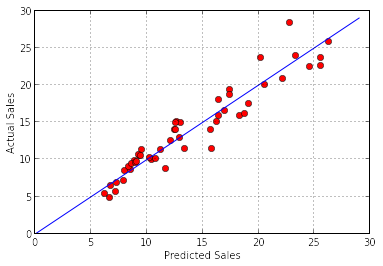

In [12]:
fig = plt.figure()
axes=fig.add_subplot(111)
a=np.arange(30)
axes.plot(y_pred, y_test, color='red',linestyle='',marker='o')
axes.plot(a,a, color='b',linestyle='-')
axes.set_xlabel('Predicted Sales')
axes.set_ylabel('Actual Sales')
axes.grid()
#pl.plot(X, y, 'r.', markersize=10, label=u'Observations')
#pl.plot(x, y_pred, 'b-', label=u'Prediction')
#pl.fill(np.concatenate([x, x[::-1]]),
 #  np.concatenate([y_pred - 1.9600 * sigma,
#                   (y_pred + 1.9600 * sigma)[::-1]]),
 #       alpha=.5, fc='b', ec='None', label='95% confidence interval')
#pl.legend(loc='upper left')
plt.show()

In [13]:
w=np.ravel(y_test)

In [14]:
x=np.arange(1,51)
pf=pd.DataFrame(x,columns=['x'])
pf['y_predicted']=y_pred
pf['y_actual']=w

In [15]:
import seaborn as sns
def draw_vertical_line(sns,y1,y2,x):
    dif=0.1
    if y1>y2:
        draw_vertical_line(sns,y2,y1,x)
    while y1<y2:
        sns.plt.plot([x],[y1],'r*')
        y1 = y1 + dif

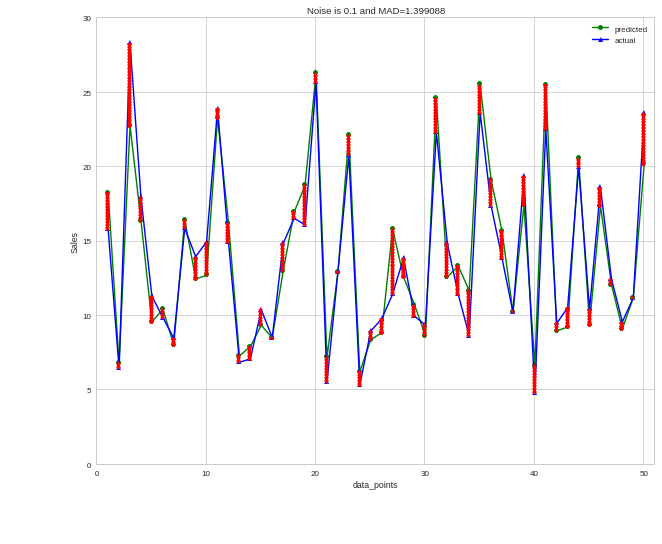

In [16]:
sns.set_context("paper")
sns.plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.plt.xlim(0,51)
sns.plt.plot(pf['x'],pf['y_predicted'],'go',linestyle='-',label='predicted')
sns.plt.plot(pf['x'],pf['y_actual'],'b^',linestyle='-',label='actual')
sns.plt.xlabel('data_points')
sns.plt.ylabel('Sales')
sns.plt.title("Noise is 0.1 and MAD=%f" %(MAD))
sns.plt.legend()


for i in xrange(50):
    draw_vertical_line(sns,y_pred[i],w[i],i+1)

sns.plt.savefig("gp_noise3.png")